<a href="https://colab.research.google.com/github/Hwarriach/Predicting_Hand_Written_Data/blob/main/Predict_Hand_Written_Digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
# Import the dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.datasets import load_digits

In [3]:
digits = load_digits()

In [4]:
#Exploring Dataset

dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [5]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

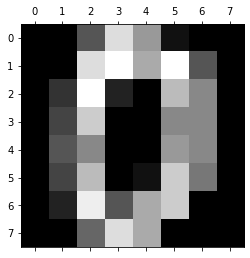

In [7]:
# Printing corresponding image of the above array

plt.gray()
plt.matshow(digits.images[0])

<Figure size 432x288 with 0 Axes>

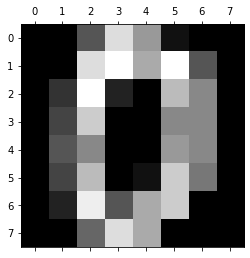

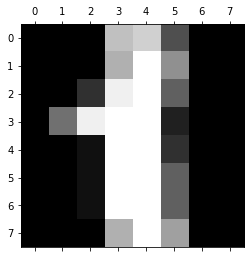

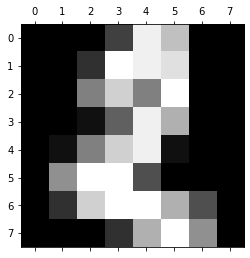

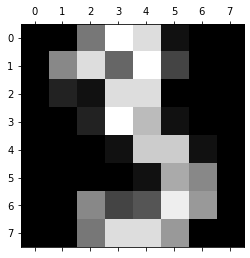

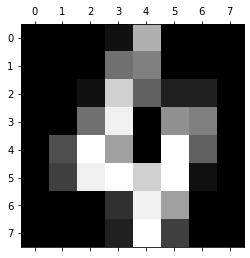

In [9]:
# Printing first 5 samples

plt.gray()
for i in range(5):
  plt.matshow(digits.images[i])

In [10]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [11]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2)

In [14]:
len(X_train)

1437

In [15]:
len(X_test)

360

In [17]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [18]:
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [19]:
model.score(X_test, y_test)

0.9583333333333334

**Picking a random sample to test against**

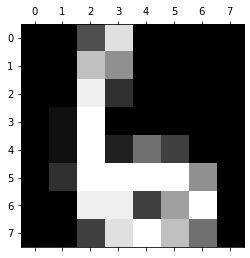

In [20]:
plt.matshow(digits.images[67])

In [21]:
digits.target[67]

6

In [23]:
# Testing model to see if it can predit the above sample

model.predict([digits.data[67]])

array([6])

In [24]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

**Creating a confusion matrix to determine where model is failing**

In [25]:
y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predicted)
cm


array([[31,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 42,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  0, 37,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 35,  0,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 36,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 37,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 23,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 30,  1,  0],
       [ 1,  1,  0,  1,  2,  1,  0,  0, 35,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 39]])

In [33]:
#Test the model
predictions = model.predict(X_test)
print(predictions)# printing predictions

print()# Printing new line

#Check precision, recall, f1-score
print( classification_report(y_test, predictions) )

[3 6 9 5 1 5 5 1 0 5 1 7 5 0 2 0 5 9 3 1 8 2 8 9 7 1 3 0 9 4 8 2 9 3 0 0 3
 6 0 4 4 0 1 2 5 4 8 5 3 8 8 7 0 9 0 0 4 8 9 4 2 7 4 3 8 3 1 2 2 0 3 7 3 2
 9 7 2 8 2 9 3 9 3 4 9 3 1 2 2 6 9 0 2 9 1 7 3 2 1 9 5 1 7 1 1 5 3 8 7 2 0
 2 9 3 9 0 8 2 2 7 9 5 8 9 6 6 5 7 1 8 0 8 6 5 8 4 5 9 8 4 2 6 9 1 8 2 1 4
 1 1 7 9 4 7 0 1 5 1 8 8 9 6 3 3 2 5 2 2 1 5 7 1 0 0 6 3 1 6 0 7 4 6 1 8 5
 3 6 9 3 8 2 2 2 4 5 1 8 9 4 1 9 6 0 9 8 6 0 7 3 5 5 5 3 5 3 8 7 0 1 6 3 9
 8 4 7 9 3 7 8 5 9 8 7 7 2 1 6 8 8 4 1 4 3 6 5 6 4 0 2 6 5 7 1 2 4 7 4 4 5
 8 0 5 3 1 7 0 8 8 2 3 5 3 8 0 2 4 1 3 8 5 8 4 7 2 5 7 3 4 0 0 2 9 7 2 0 6
 6 2 4 1 2 7 5 9 2 9 9 2 6 3 1 0 5 4 6 1 9 9 9 4 7 4 1 4 1 7 5 4 4 4 6 3 1
 1 4 1 1 7 9 4 8 9 4 3 4 5 0 5 9 8 4 1 1 5 9 3 5 9 1 5]

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        32
           1       0.95      0.98      0.97        43
           2       0.97      1.00      0.99        37
           3       0.97      0.97      0.97        

Text(69.0, 0.5, 'Truth')

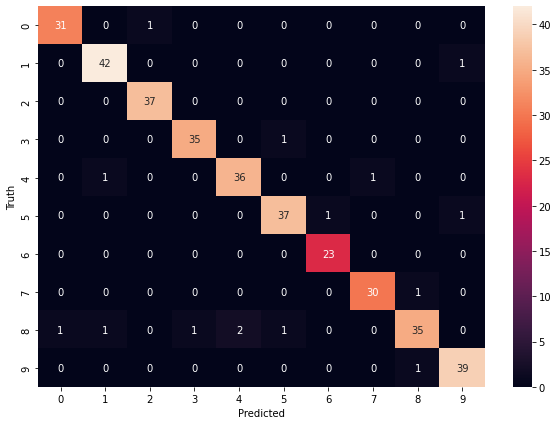

In [26]:
# Visualizing the above matrix. Prediction errors can be spotted clearly. 

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')